In [1]:
import numpy as np 
from stingray import Lightcurve, Powerspectrum, Multitaper
from stingray.multitaper import plot_dB
from stingray import sampledata

/home/dhruv/misc-projects/stingray/stingray/largememory.py:25: UserWarning: Large Datasets may not be processed efficiently due to computational constraints
  warnings.warn(


In [2]:
dt = 0.03125  # seconds
exposure = 8.  # seconds
times = np.arange(0, exposure, dt)  # seconds

signal = 300 * (np.sin(2.*np.pi*times/0.5)  + np.sin(2.*np.pi*times/0.25) + np.sin(2.*np.pi*times/0.0689655)) + 1000  # counts/s
noisy = np.random.poisson(signal*dt)  # counts

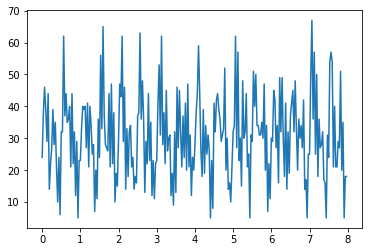

In [3]:
lc = Lightcurve(times, noisy, dt=dt)
lc.plot()

In [4]:
ps = Powerspectrum(lc, norm='none')
mtp = Multitaper(lc, norm='none')
print(ps)
print(mtp)

In [5]:
print(f"The frequency resolution : {mtp.df}")

print(f"The number of power spectra averaged together. For a Multitaper periodogram of a single segment, m=1 : {mtp.m}")
print(f"The number of data points (time bins) in one segment of the light curve : {mtp.n}")
print(f"The total number of photons in the light curve : {mtp.nphots}")
print(f"Mid-bin frequencies that the Fourier transform samples (first 10): \n {mtp.freq[:10]}")
print(f"Multitaper power spectrum (first 10): \n {mtp.power[:10]}")

The frequency resolution : 0.125
The number of power spectra averaged together. For a Multitaper periodogram of a single segment, m=1 : 1
The number of data points (time bins) in one segment of the light curve : 256
The total number of photons in the light curve : 7851.0
Mid-bin frequencies that the Fourier transform samples (first 10): 
 [0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.    1.125 1.25 ]
Multitaper power spectrum (first 10): 
 [ 2.91451914  3.14080077  4.25118298  4.08212778  3.92601382  6.7700702
  6.91678137 10.5989704  12.35170883  9.98622111]


In [6]:
print(len(mtp.freq))
print(len(ps.freq))
print(len(mtp.power))
print(len(mtp.unnorm_power))
print(len(mtp.jk_var_deg_freedom))

127
127
127
127
129


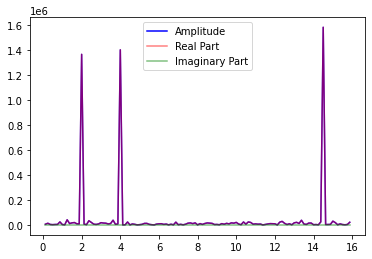

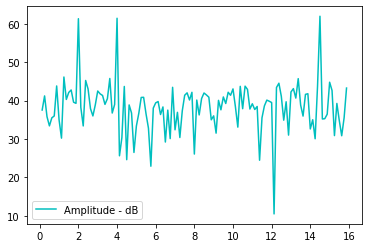

In [7]:
ps.plot()
plot_dB(ps.freq, ps.power)

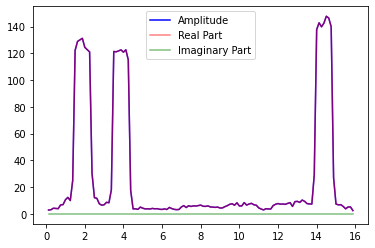

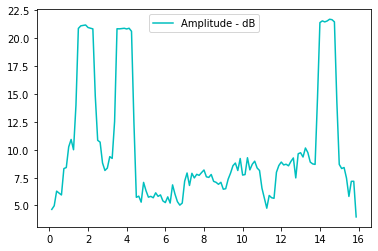

In [8]:
mtp.plot()
plot_dB(mtp.freq, mtp.power)

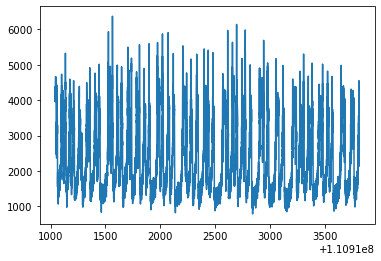

In [9]:
lc_sample = sampledata.sample_data()
lc_sample.plot()

In [10]:
ps_sample = Powerspectrum(lc_sample, norm='none')
mtp_sample = Multitaper(lc_sample, norm='none')

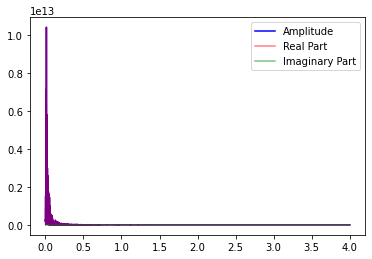

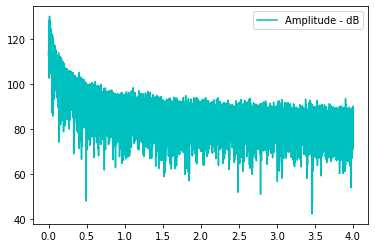

In [11]:
ps_sample.plot()
plot_dB(ps_sample.freq, ps_sample.power)

In [12]:
print(len(mtp_sample.freq))
print(len(ps_sample.freq))
print(len(mtp_sample.power))
print(len(mtp_sample.unnorm_power))
print(len(mtp_sample.jk_var_deg_freedom))

11071
11071
11071
11071
11072


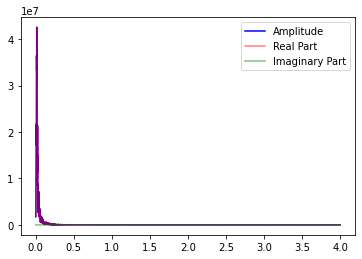

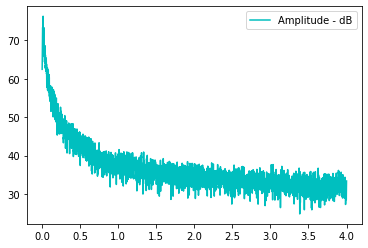

In [13]:
mtp_sample.plot()
plot_dB(mtp_sample.freq, mtp_sample.power)

In [14]:
import matplotlib.pyplot as plt

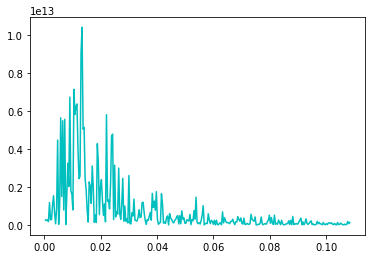

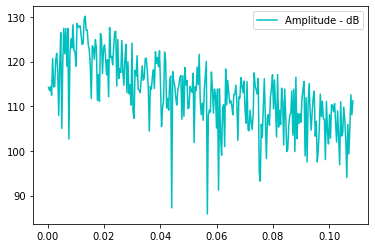

In [15]:
imp_freq = ps_sample.freq[:300]  # Taking as closer look at the important frequencies
imp_power = ps_sample.power[:300]
plt.figure("Imp PS")
plt.plot(imp_freq,
        np.abs(imp_power),
        color='c',
        label='Amplitude - dB')
plot_dB(imp_freq, imp_power)

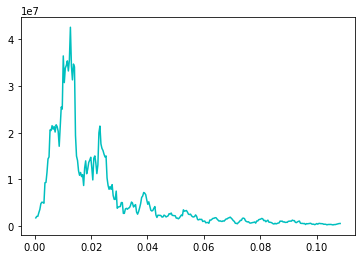

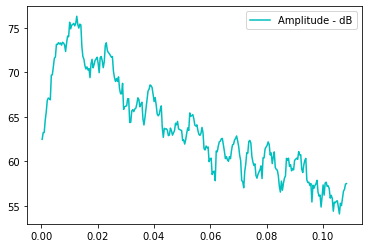

In [16]:
imp_freq = mtp_sample.freq[:300]    # Zooming in where the action is
imp_power = mtp_sample.power[:300]
plt.figure("Imp MTP")
plt.plot(imp_freq,
        np.abs(imp_power),
        color='c',
        label='Amplitude - dB')
plot_dB(imp_freq, imp_power)        